##  Author : Akshay Pharande
### Task 6 : Prediction using Decision Tree Algorithm

### Objective :
● Create the Decision Tree classifier and visualize it graphically.

● The purpose is if we feed any new data to this classifier, it would be able to
predict the right class accordingly.

## Table of Content

* __Step 1: Importing the Relevant Libraries__
    
* __Step 2: Data Loading and Inspection__
    
* __Step 3: Exploratory Data Analysis__
    
* __Step 4: Building Model__
    
* __Step 5: Checking the performance of model__

* __Step 6: Predicting Iris Species classes for new data points__
    

### Step 1: Importing the Relevant Libraries


In [1]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

### Step 2: Data Loading and Inspection

In [2]:
# loading the pre-processed dataset
data = pd.read_csv("E:/Sparks_Foundation_internship/Iris.csv")

In [3]:
#shape of the data
data.shape

(150, 6)

* __In this dataset We have 150 rows and 6 columns.__

In [4]:
#first five rows of the data
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Step 3: Exploratory Data Analysis

In [5]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
#ratio of null values
data.isnull().sum()/data.shape[0] *100

Id               0.0
SepalLengthCm    0.0
SepalWidthCm     0.0
PetalLengthCm    0.0
PetalWidthCm     0.0
Species          0.0
dtype: float64

* __There is No missing values present in this dataset, therefore there is no need of data cleaning.__

In [7]:
data.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

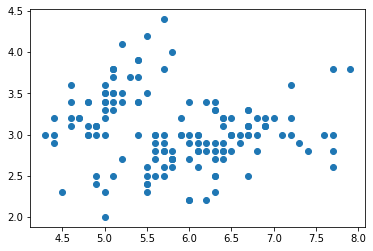

In [8]:
#Visualizing the dataset features to find pattern to solve our task
plt.scatter(data['SepalLengthCm'],data['SepalWidthCm'])
plt.show()

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

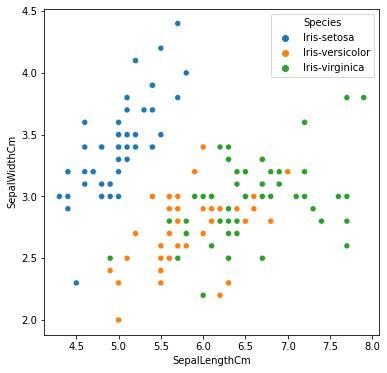

In [9]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(data=data, x="SepalLengthCm", y="SepalWidthCm", hue="Species")

### Step 4: Building Model

In [10]:
#Droping Id column as it is of no use in classifing the class labels..

data.drop(['Id'],axis=1,inplace=True)

In [11]:
# separating the independent and dependent variables

# storing all the independent variables as X
X = data.drop(['Species'], axis=1)

# storing the dependent variable as y
y = data['Species']

In [12]:
# shape of independent and dependent variables
X.shape, y.shape

((150, 4), (150,))

In [13]:
#importing sklearn and train_test_split to create validation set
import sklearn
from sklearn.model_selection import train_test_split

#creating the train and validation set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, stratify=y, random_state = 70)

In [14]:
#importing decision tree classifier 
from sklearn.tree import DecisionTreeClassifier

In [15]:
#fitting the model
dt_model = DecisionTreeClassifier(random_state=10)

In [16]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [17]:
#checking the training score
print('Accuracy score is:',dt_model.score(X_train, y_train))

Accuracy score is: 1.0


In [18]:
#predictions on validation set
dt_predict=dt_model.predict(X_test)

In [19]:
dt_predict

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor'], dtype=object)

In [20]:
#checking the validation score
print('Accuracy score for validation test data is:',accuracy_score(y_test,dt_predict))

Accuracy score for validation test data is: 0.9333333333333333


In [21]:
print('Model Accuracy Score on totally unseen data(Xtest) is:',accuracy_score(y_test,dt_predict))

Model Accuracy Score on totally unseen data(Xtest) is: 0.9333333333333333


### Checking for optimum max_depth of tree

In [22]:
train_accuracy = []
validation_accuracy = []
for depth in range(1,15):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=6)
    dt_model.fit(X_train, y_train)
    train_accuracy.append(dt_model.score(X_train, y_train))
    validation_accuracy.append(dt_model.score(X_test, y_test))

In [23]:
frame = pd.DataFrame({'max_depth':range(1,15), 'train_acc':train_accuracy, 'test_acc':validation_accuracy})
frame.head()

,max_depth,train_acc,test_acc
0,1,0.666667,0.666667
1,2,0.971429,0.911111
2,3,0.971429,0.911111
3,4,0.980952,0.955556
4,5,0.990476,0.911111


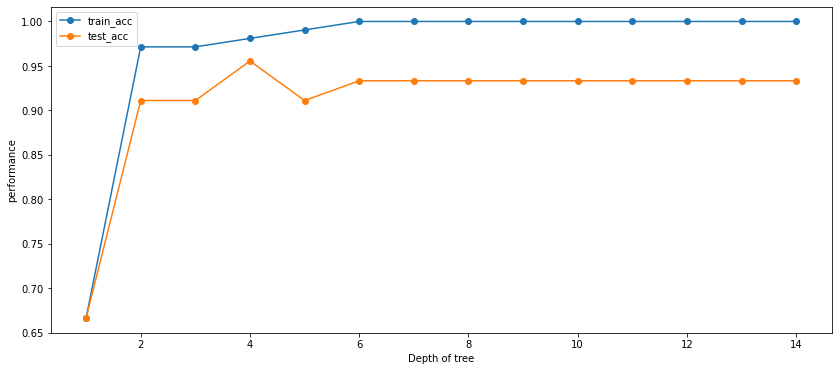

In [24]:
plt.figure(figsize=(14,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['test_acc'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend(['train_acc','test_acc'])

#### Model Building using optimum depth of decision tree

In [25]:
dt_model1 = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=6, min_samples_split=2)

In [26]:
#fitting the model
dt_model1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=6)

In [27]:
#Training score
print('Accuracy score is:',dt_model1.score(X_train, y_train))

Accuracy score is: 0.9809523809523809


In [28]:
#Validation score
print('Accuracy score for validation test data is:',dt_model1.score(X_test, y_test))

Accuracy score for validation test data is: 0.9555555555555556


#### Accuracy after optimising the performance:

In [29]:
dt_predict1=dt_model1.predict(X_test)

In [30]:
#Validation score
dt_model1.score(X_test, dt_predict1)
print('Model Accuracy Score on totally unseen data(Xtest) is:',accuracy_score(y_test,dt_predict1))

Model Accuracy Score on totally unseen data(Xtest) is: 0.9555555555555556


### Visualizing Decision Tree

In [31]:
from sklearn import tree

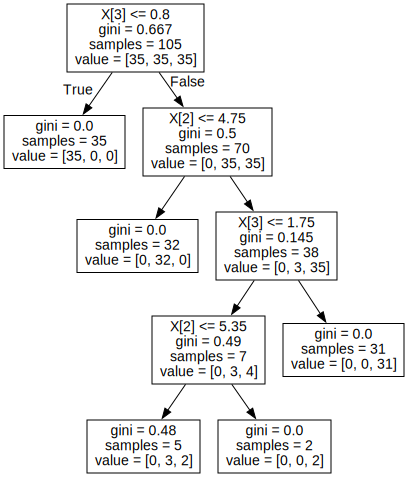

In [32]:
#Visualizing Decision Tree using graphviz library
import graphviz
dot_data = tree.export_graphviz(dt_model1, out_file=None)

graph = graphviz.Source(dot_data)
graph

### Step 5 :  Checking for the performance of model

In [33]:
# Get the confusion Matrix of the Model
cnf_matrix = metrics.confusion_matrix(y_test,dt_predict1)
cnf_matrix

array([[15,  0,  0],
       [ 0, 14,  1],
       [ 0,  1, 14]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

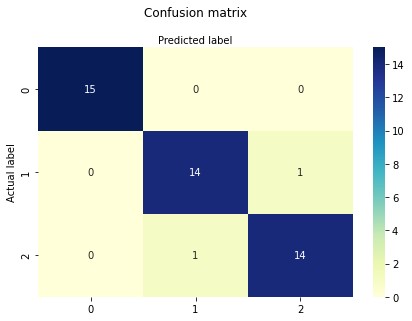

In [34]:
# Plot the Confusion Matrix as a HeatMap
import seaborn as sns
class_names=['Iris-setosa','Iris-versicolor','Iris-virginica'] # Name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [35]:
print(metrics.classification_report(y, dt_model.predict(X),zero_division=1)) # Displays a comprehensive Report of the DT Model

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.98      0.96      0.97        50
 Iris-virginica       0.96      0.98      0.97        50

       accuracy                           0.98       150
      macro avg       0.98      0.98      0.98       150
   weighted avg       0.98      0.98      0.98       150



### Step 6: Predicting Iris Species classes for new data points

In [36]:
Test_point = [[5.4,3.0,4.5,1.5],
             [6.5,2.8,4.6,1.5],
             [5.1,2.5,3.0,1.1],
             [5.1,3.3,1.7,0.5],
             [6.0,2.7,5.1,1.6],
             [6.0,2.2,5.0,1.5]]

print(dt_model.predict(Test_point))

['Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica']


#### END